In [191]:
import os 
import requests

pdf_path = "Resources\Sem - 4 OS\Abraham Silberschatz, Peter B. Galvin, Greg Gagne - Operating System Concepts-Wiley (2012).pdf"

if not os.path.exists(pdf_path):
    print(f"[INFO] File doesn't exist, Downloading......")


else:   
    print(f"File {pdf_path} exists.")

File Resources\Sem - 4 OS\Abraham Silberschatz, Peter B. Galvin, Greg Gagne - Operating System Concepts-Wiley (2012).pdf exists.


In [192]:
import fitz
from tqdm.auto import tqdm

def text_formatter(text: str) -> str:
    """Performs minor formatting on text."""

    cleaned_text = text.replace("\n", " ").strip()

    return cleaned_text

def open_and_read_pdf(pdf_path: str) -> list[dict]:
    doc = fitz.open(pdf_path)
    pages_and_texts = []
    for page_number, page in tqdm(enumerate(doc)):
        text = page.get_text()
        text = text_formatter(text=text)
        pages_and_texts.append({"page_number": page_number - 26,
                                "page_char_count": len(text),
                                "page_word_count": len(text.split(" ")),
                                "page_sentence_count_raw": len(text.split(". ")),
                                "page_token_count": len(text) / 4,
                                "text": text})
        
    return pages_and_texts
pages_and_texts = open_and_read_pdf(pdf_path=pdf_path)
pages_and_texts[:2]

0it [00:00, ?it/s]

[{'page_number': -26,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''},
 {'page_number': -25,
  'page_char_count': 0,
  'page_word_count': 1,
  'page_sentence_count_raw': 1,
  'page_token_count': 0.0,
  'text': ''}]

In [193]:
import random

random.sample(pages_and_texts, k=3)

[{'page_number': 678,
  'page_char_count': 3411,
  'page_word_count': 575,
  'page_sentence_count_raw': 30,
  'page_token_count': 852.75,
  'text': '15.4 Cryptography as a Security Tool 681 the ﬁlling out of electronic forms as an alternative to the signing of paper contracts. Nonrepudiation assures that a person ﬁlling out an electronic form cannot deny that he did so. 15.4.1.4 Key Distribution Certainly, a good part of the battle between cryptographers (those inventing ciphers) and cryptanalysts (those trying to break them) involves keys. With symmetric algorithms, both parties need the key, and no one else should have it. The delivery of the symmetric key is a huge challenge. Sometimes it is performed out-of-band—say, via a paper document or a conversation. These methods do not scale well, however. Also consider the key-management challenge. Suppose a user wanted to communicate with N other users privately. That user would need N keys and, for more security, would need to change tho

In [194]:
import pandas as pd

df = pd.DataFrame(pages_and_texts)
df.head

<bound method NDFrame.head of      page_number  page_char_count  page_word_count  page_sentence_count_raw  \
0            -26                0                1                        1   
1            -25                0                1                        1   
2            -24               39                5                        1   
3            -23                0                1                        1   
4            -22              143               18                        1   
..           ...              ...              ...                      ...   
939          913             1780              222                        1   
940          914             1785              236                        1   
941          915             1665              225                        2   
942          916              391               56                        1   
943          917                0                1                        1   

     page_token_count

In [195]:
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count
count,944.00,944.00,944.00,944.00,944.00
mean,445.50,2446.91,399.22,22.55,611.73
std,272.65,822.93,136.54,10.89,205.73
min,-26.00,0.00,1.00,1.00,0.00
25%,209.75,1958.50,319.00,17.00,489.62
50%,445.50,2513.50,407.50,23.00,628.38
75%,681.25,3139.25,511.00,28.00,784.81
max,917.00,3847.00,667.00,83.00,961.75


In [196]:
from spacy.lang.en import English

nlp = English()

nlp.add_pipe("sentencizer")

doc = nlp("This is a sentence. This is another sentence. I like elephants.")
assert len(list(doc.sents)) == 3

list(doc.sents)


[This is a sentence., This is another sentence., I like elephants.]

In [197]:
for item in tqdm(pages_and_texts):
    item["sentences"] = list(nlp(item["text"]).sents)
    
    # Make sure all sentences are strings
    item["sentences"] = [str(sentence) for sentence in item["sentences"]]
    
    # Count the sentences 
    item["page_sentence_count_spacy"] = len(item["sentences"])

  0%|          | 0/944 [00:00<?, ?it/s]

In [198]:
# Inspect an example
random.sample(pages_and_texts, k=1)

[{'page_number': 668,
  'page_char_count': 2355,
  'page_word_count': 376,
  'page_sentence_count_raw': 20,
  'page_token_count': 588.75,
  'text': '15.3 System and Network Threats 671 grappling  hook worm target system worm infected system rsh attack finger attack sendmail attack request for worm worm sent Figure 15.6 The Morris Internet worm. they access a remote account on the paired list. The worm searched these special ﬁles for site names that would allow remote execution without a password. Where remote shells were established, the worm program was uploaded and began executing anew. The attack via remote access was one of three infection methods built into the worm. The other two methods involved operating-system bugs in the UNIX finger and sendmail programs. The finger utility functions as an electronic telephone directory. The command finger user-name@hostname returns a person’s real and login names along with other information that the user may have provided, such as ofﬁce and

In [199]:
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy
count,944.00,944.00,944.00,944.00,944.00,944.00
mean,445.50,2446.91,399.22,22.55,611.73,21.45
std,272.65,822.93,136.54,10.89,205.73,8.51
min,-26.00,0.00,1.00,1.00,0.00,0.00
25%,209.75,1958.50,319.00,17.00,489.62,17.00
50%,445.50,2513.50,407.50,23.00,628.38,22.00
75%,681.25,3139.25,511.00,28.00,784.81,28.00
max,917.00,3847.00,667.00,83.00,961.75,39.00


In [200]:
# Define split size to turn groups of sentences into chunks
num_sentence_chunk_size = 10 

# Create a function that recursively splits a list into desired sizes
def split_list(input_list: list, 
               slice_size: int) -> list[list[str]]:
    """
    Splits the input_list into sublists of size slice_size (or as close as possible).

    For example, a list of 17 sentences would be split into two lists of [[10], [7]]
    """
    return [input_list[i:i + slice_size] for i in range(0, len(input_list), slice_size)]

# Loop through pages and texts and split sentences into chunks
for item in tqdm(pages_and_texts):
    item["sentence_chunks"] = split_list(input_list=item["sentences"],
                                         slice_size=num_sentence_chunk_size)
    item["num_chunks"] = len(item["sentence_chunks"])

  0%|          | 0/944 [00:00<?, ?it/s]

In [201]:
# Sample an example from the group 
random.sample(pages_and_texts, k=1)

[{'page_number': 529,
  'page_char_count': 3218,
  'page_word_count': 515,
  'page_sentence_count_raw': 26,
  'page_token_count': 804.5,
  'text': '532 Chapter 11 File-System Interface server is again reachable. These failure semantics are deﬁned and implemented as part of the remote-ﬁle-system protocol. Termination of all operations can result in users’ losing data—and patience. Thus, most DFS protocols either enforce or allow delaying of ﬁle-system operations to remote hosts, with the hope that the remote host will become available again. To implement this kind of recovery from failure, some kind of state information may be maintained on both the client and the server. If both server and client maintain knowledge of their current activities and open ﬁles, then they can seamlessly recover from a failure. In the situation where the server crashes but must recognize that it has remotely mounted exported ﬁle systems and opened ﬁles, NFS takes a simple approach, implementing a stateless D

In [202]:
# Create a DataFrame to get stats
df = pd.DataFrame(pages_and_texts)
df.describe().round(2)

,page_number,page_char_count,page_word_count,page_sentence_count_raw,page_token_count,page_sentence_count_spacy,num_chunks
count,944.00,944.00,944.00,944.00,944.00,944.00,944.00
mean,445.50,2446.91,399.22,22.55,611.73,21.45,2.58
std,272.65,822.93,136.54,10.89,205.73,8.51,0.91
min,-26.00,0.00,1.00,1.00,0.00,0.00,0.00
25%,209.75,1958.50,319.00,17.00,489.62,17.00,2.00
50%,445.50,2513.50,407.50,23.00,628.38,22.00,3.00
75%,681.25,3139.25,511.00,28.00,784.81,28.00,3.00
max,917.00,3847.00,667.00,83.00,961.75,39.00,4.00


In [203]:
import re

# Split each chunk into its own item
pages_and_chunks = []
for item in tqdm(pages_and_texts):
    for sentence_chunk in item["sentence_chunks"]:
        chunk_dict = {}
        chunk_dict["page_number"] = item["page_number"]
        
        # Join the sentences together into a paragraph-like structure, aka a chunk )
        joined_sentence_chunk = "".join(sentence_chunk).replace("  ", " ").strip()
        joined_sentence_chunk = re.sub(r'\.([A-Z])', r'. \1', joined_sentence_chunk) 
        chunk_dict["sentence_chunk"] = joined_sentence_chunk

        # Get stats about the chunk
        chunk_dict["chunk_char_count"] = len(joined_sentence_chunk)
        chunk_dict["chunk_word_count"] = len([word for word in joined_sentence_chunk.split(" ")])
        chunk_dict["chunk_token_count"] = len(joined_sentence_chunk) / 4 
        
        pages_and_chunks.append(chunk_dict)

# How many chunks do we have?
len(pages_and_chunks)

  0%|          | 0/944 [00:00<?, ?it/s]

2434

In [204]:
# View a random sample
random.sample(pages_and_chunks, k=1)

[{'page_number': 435,
  'sentence_chunk': 'The slab consists of both used and free objects. The slab allocator ﬁrst attempts to satisfy the request with a free object in a partial slab. If none exists, a free object is assigned from an empty slab. If no empty slabs are available, a new slab is allocated from contiguous physical pages and assigned to a cache; memory for the object is allocated from this slab. The slab allocator provides two main beneﬁts: 1. No memory is wasted due to fragmentation. Fragmentation is not an issue because each unique kernel data structure has an associated cache, and each cache is made up of one or more slabs that are divided into',
  'chunk_char_count': 625,
  'chunk_word_count': 112,
  'chunk_token_count': 156.25}]

In [205]:
# Get stats about our chunks
df = pd.DataFrame(pages_and_chunks)
df.describe().round(2)

,page_number,chunk_char_count,chunk_word_count,chunk_token_count
count,2434.00,2434.00,2434.00,2434.00
mean,462.73,947.30,153.73,236.82
std,268.03,382.34,62.07,95.58
min,-24.00,2.00,1.00,0.50
25%,232.25,734.00,118.00,183.50
50%,478.00,1011.00,164.00,252.75
75%,693.00,1202.00,196.00,300.50
max,916.00,2785.00,407.00,696.25


In [206]:
# Show random chunks with under 30 tokens in length
min_token_length = 30
for row in df[df["chunk_token_count"] <= min_token_length].sample(5).iterrows():
    print(f'Chunk token count: {row[1]["chunk_token_count"]} | Text: {row[1]["sentence_chunk"]}')

Chunk token count: 26.25 | Text: Because no trap is generated if popf is executed in user mode, the trap-and-emulate procedure is rendered
Chunk token count: 11.25 | Text: Viruses are a particular problem for users of
Chunk token count: 0.5 | Text: To
Chunk token count: 19.25 | Text: 16KB 8KB 8KB 8KB 4KB 4KB Figure 18.4 Splitting of memory in the buddy system.
Chunk token count: 5.25 | Text: 1979)]) and the Pilot


In [207]:
pages_and_chunks_over_min_token_len = df.to_dict(orient="records")
pages_and_chunks_over_min_token_len[:2]

[{'page_number': -24,
  'sentence_chunk': 'OPERATING SYSTEM CONCEPTS NINTH EDITION',
  'chunk_char_count': 39,
  'chunk_word_count': 5,
  'chunk_token_count': 9.75},
 {'page_number': -22,
  'sentence_chunk': 'OPERATING SYSTEM CONCEPTS ABRAHAM SILBERSCHATZ Yale University PETER BAER GALVIN Pluribus Networks GREG GAGNE Westminster College NINTH EDITION',
  'chunk_char_count': 143,
  'chunk_word_count': 18,
  'chunk_token_count': 35.75}]

In [208]:

from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", 
                                      device="cpu") # choose the device to load the model to 

# Create a list of sentences to turn into numbers
sentences = [
    "The Sentences Transformers library provides an easy and open-source way to create embeddings.",
    "Sentences can be embedded one by one or as a list of strings.",
    "Embeddings are one of the most powerful concepts in machine learning!",
    "Learn to use embeddings well and you'll be well on your way to being an AI engineer."
]

# Sentences are encoded/embedded by calling model.encode()
embeddings = embedding_model.encode(sentences)
embeddings_dict = dict(zip(sentences, embeddings))

# See the embeddings
for sentence, embedding in embeddings_dict.items():
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

c:\Users\Anshul Banda\Desktop\GitHub\HSP Prob.lm\prob.lm\.venv\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Sentence: The Sentences Transformers library provides an easy and open-source way to create embeddings.
Embedding: [-2.07981672e-02  3.03164534e-02 -2.01217886e-02  6.86483830e-02
 -2.55256146e-02 -8.47689062e-03 -2.07142002e-04 -6.32377490e-02
  2.81606019e-02 -3.33353467e-02  3.02634742e-02  5.30720390e-02
 -5.03526069e-02  2.62288302e-02  3.33313793e-02 -4.51578386e-02
  3.63044590e-02 -1.37114455e-03 -1.20171346e-02  1.14946747e-02
  5.04510440e-02  4.70856838e-02  2.11912915e-02  5.14607430e-02
 -2.03746408e-02 -3.58889215e-02 -6.67911547e-04 -2.94393376e-02
  4.95859385e-02 -1.05639230e-02 -1.52014326e-02 -1.31756242e-03
  4.48197052e-02  1.56023148e-02  8.60379942e-07 -1.21392100e-03
 -2.37978827e-02 -9.09408729e-04  7.34485360e-03 -2.53935228e-03
  5.23369797e-02 -4.68042754e-02  1.66214649e-02  4.71578874e-02
 -4.15599570e-02  9.01946682e-04  3.60278748e-02  3.42214927e-02
  9.68227759e-02  5.94828650e-02 -1.64984893e-02 -3.51249650e-02
  5.92515012e-03 -7.07977451e-04 -2.4103

In [209]:
single_sentence = "Yo! How cool are embeddings?"
single_embedding = embedding_model.encode(single_sentence)
print(f"Sentence: {single_sentence}")
print(f"Embedding:\n{single_embedding}")
print(f"Embedding size: {single_embedding.shape}")

Sentence: Yo! How cool are embeddings?
Embedding:
[-1.97447557e-02 -4.51087812e-03 -4.98482119e-03  6.55444711e-02
 -9.87676159e-03  2.72835623e-02  3.66426148e-02 -3.30224284e-03
  8.50076973e-03  8.24948400e-03 -2.28497181e-02  4.02429961e-02
 -5.75200096e-02  6.33692592e-02  4.43207547e-02 -4.49507385e-02
  1.25284195e-02 -2.52012350e-02 -3.55292223e-02  1.29559385e-02
  8.67022946e-03 -1.92917287e-02  3.55628273e-03  1.89505890e-02
 -1.47128049e-02 -9.39845853e-03  7.64168892e-03  9.62188747e-03
 -5.98928845e-03 -3.90169173e-02 -5.47824614e-02 -5.67457359e-03
  1.11645376e-02  4.08067219e-02  1.76319088e-06  9.15296562e-03
 -8.77261534e-03  2.39382591e-02 -2.32784078e-02  8.04999545e-02
  3.19176763e-02  5.12596220e-03 -1.47708524e-02 -1.62524320e-02
 -6.03212640e-02 -4.35689725e-02  4.51211594e-02 -1.79053564e-02
  2.63367072e-02 -3.47867236e-02 -8.89172871e-03 -5.47675341e-02
 -1.24372784e-02 -2.38606706e-02  8.33496451e-02  5.71242943e-02
  1.13329012e-02 -1.49594918e-02  9.2037

In [210]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

2.7.1+cu126
True
1
NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [211]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

CUDA available: True
Device name: NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [212]:
%%time

# Send the model to the GPU
embedding_model.to("cuda") 

# Create embeddings one by one on the GPU
for item in tqdm(pages_and_chunks_over_min_token_len):
    item["embedding"] = embedding_model.encode(item["sentence_chunk"])

  0%|          | 0/2434 [00:00<?, ?it/s]

CPU times: total: 6min 50s
Wall time: 52.6 s


In [213]:
# Turn text chunks into a single list
text_chunks = [item["sentence_chunk"] for item in pages_and_chunks_over_min_token_len]

In [214]:
%%time

# Embed all texts in batches
text_chunk_embeddings = embedding_model.encode(text_chunks,
                                               batch_size=32, 
                                               convert_to_tensor=True) 

text_chunk_embeddings

CPU times: total: 2min 59s
Wall time: 1min 2s


tensor([[-0.0093, -0.1096, -0.0222,  ...,  0.0005,  0.0168,  0.0065],
        [-0.0046, -0.0629, -0.0098,  ..., -0.0255,  0.0353, -0.0117],
        [ 0.0291,  0.0571, -0.0119,  ..., -0.0254, -0.0402, -0.0149],
        ...,
        [ 0.0348, -0.1303, -0.0174,  ..., -0.0401, -0.0201, -0.0353],
        [ 0.0247, -0.0958, -0.0242,  ..., -0.0174, -0.0219,  0.0144],
        [-0.0498, -0.0549, -0.0146,  ..., -0.0318, -0.0248,  0.0088]],
       device='cuda:0')

In [215]:
# Save embeddings to file
text_chunks_and_embeddings_df = pd.DataFrame(pages_and_chunks_over_min_token_len)
embeddings_df_save_path = "text_chunks_and_embeddings_df.csv"
text_chunks_and_embeddings_df.to_csv(embeddings_df_save_path, index=False)

In [216]:
# Import saved file and view
text_chunks_and_embedding_df_load = pd.read_csv(embeddings_df_save_path)
text_chunks_and_embedding_df_load.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-24,OPERATING SYSTEM CONCEPTS NINTH EDITION,39,5,9.75,[-9.34108440e-03 -1.09646626e-01 -2.22021025e-...
1,-22,OPERATING SYSTEM CONCEPTS ABRAHAM SILBERSCHATZ...,143,18,35.75,[-4.60509630e-03 -6.28757030e-02 -9.79845785e-...
2,-21, VicePresidentandExecutivePublisher   ...,2785,88,696.25,[ 2.90520824e-02 5.71132228e-02 -1.18506793e-...
3,-20,"To my children, Lemor, Sivan, and Aaron and my...",196,35,49.00,[ 1.40325753e-02 5.10208979e-02 -3.91945505e-...
4,-18,Preface Operating systems are an essential par...,1163,183,290.75,[ 1.84280910e-02 -6.02755100e-02 -3.02672237e-...


In [217]:
import random

import torch
import numpy as np 
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"

# Import texts and embedding df
text_chunks_and_embedding_df = pd.read_csv("text_chunks_and_embeddings_df.csv")

# Convert embedding column back to np.array (it got converted to string when it got saved to CSV)
text_chunks_and_embedding_df["embedding"] = text_chunks_and_embedding_df["embedding"].apply(lambda x: np.fromstring(x.strip("[]"), sep=" "))

embeddings = torch.tensor(np.stack(text_chunks_and_embedding_df["embedding"].tolist(), axis=0), dtype=torch.float32).to(device)

# Convert texts and embedding df to list of dicts
pages_and_chunks = text_chunks_and_embedding_df.to_dict(orient="records")

text_chunks_and_embedding_df

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-24,OPERATING SYSTEM CONCEPTS NINTH EDITION,39,5,9.75,"[-0.0093410844, -0.109646626, -0.0222021025, 0..."
1,-22,OPERATING SYSTEM CONCEPTS ABRAHAM SILBERSCHATZ...,143,18,35.75,"[-0.0046050963, -0.062875703, -0.00979845785, ..."
2,-21, VicePresidentandExecutivePublisher   ...,2785,88,696.25,"[0.0290520824, 0.0571132228, -0.0118506793, -0..."
3,-20,"To my children, Lemor, Sivan, and Aaron and my...",196,35,49.00,"[0.0140325753, 0.0510208979, -0.000391945505, ..."
4,-18,Preface Operating systems are an essential par...,1163,183,290.75,"[0.018428091, -0.06027551, -0.0302672237, 0.02..."
...,...,...,...,...,...,...
2429,912,"M Mac OS X operating system, 84 main memory: p...",1650,230,412.50,"[0.0344647914, -0.0915224105, -0.0293325782, -..."
2430,913,"PFN database, 850–851 platform as a service (P...",1780,222,445.00,"[0.0229780618, -0.0337628908, -0.0438321382, 0..."
2431,914,"services, operating system, 115 session manage...",1785,236,446.25,"[0.0347881354, -0.130288735, -0.0173814259, 0...."
2432,915,"U UAC (User Account Control), 701 UI (user int...",1665,225,416.25,"[0.0246770941, -0.0958156139, -0.0242252778, 0..."


In [218]:
text_chunks_and_embedding_df.head()

,page_number,sentence_chunk,chunk_char_count,chunk_word_count,chunk_token_count,embedding
0,-24,OPERATING SYSTEM CONCEPTS NINTH EDITION,39,5,9.75,"[-0.0093410844, -0.109646626, -0.0222021025, 0..."
1,-22,OPERATING SYSTEM CONCEPTS ABRAHAM SILBERSCHATZ...,143,18,35.75,"[-0.0046050963, -0.062875703, -0.00979845785, ..."
2,-21, VicePresidentandExecutivePublisher   ...,2785,88,696.25,"[0.0290520824, 0.0571132228, -0.0118506793, -0..."
3,-20,"To my children, Lemor, Sivan, and Aaron and my...",196,35,49.00,"[0.0140325753, 0.0510208979, -0.000391945505, ..."
4,-18,Preface Operating systems are an essential par...,1163,183,290.75,"[0.018428091, -0.06027551, -0.0302672237, 0.02..."


In [219]:
embeddings[0]

tensor([-9.3411e-03, -1.0965e-01, -2.2202e-02,  2.0250e-02,  9.0829e-03,
        -9.6274e-04,  5.6298e-02, -1.2938e-02,  8.7191e-03, -1.4140e-02,
         2.4240e-02,  1.8037e-02,  1.8078e-02,  4.0845e-02, -2.2718e-02,
        -9.3245e-02,  8.1866e-02, -1.1324e-02, -4.9800e-02, -1.2657e-02,
         7.2930e-03, -3.4538e-02,  1.4950e-02, -1.7490e-03, -8.0479e-04,
        -4.4104e-02, -1.6424e-02,  8.8891e-02, -5.7764e-02, -6.2114e-03,
        -1.5991e-02,  1.8734e-03,  1.2108e-02,  3.4397e-02,  1.3872e-06,
        -2.2417e-02, -2.0510e-02,  4.7140e-02, -3.3118e-02,  4.3325e-02,
         4.8227e-02,  6.9336e-02, -7.1520e-03,  3.5204e-03,  6.1925e-02,
        -5.7171e-03,  2.8443e-02,  4.0740e-02,  2.0275e-02, -1.1649e-02,
        -1.0338e-02,  2.8665e-03, -7.4062e-02,  3.0088e-02, -2.9951e-02,
         2.9030e-02,  1.7426e-02,  6.6102e-02,  6.8464e-02, -2.0715e-03,
        -3.5349e-02, -7.6136e-02, -1.8487e-03, -3.6777e-02,  3.6778e-02,
        -6.7405e-03,  7.2232e-03, -1.1412e-02, -2.4

In [220]:
from sentence_transformers import util, SentenceTransformer

embedding_model = SentenceTransformer(model_name_or_path="all-mpnet-base-v2", 
                                      device=device) # choose the device to load the model to

c:\Users\Anshul Banda\Desktop\GitHub\HSP Prob.lm\prob.lm\.venv\Lib\site-packages\huggingface_hub\file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [221]:
#defining the query
query = "Interrupts"
print(f"Query: {query}")

#embed the query to the same numerical space as the text examples
query_embedding = embedding_model.encode(query, convert_to_tensor=True).to("cuda")

#Get similarity scores with the dot product 
from time import perf_counter as timer

start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=embeddings)[0]
end_time = timer()

print(f"Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")


# get the top-k results
top_results_dot_product = torch.topk(dot_scores, k = 5)
top_results_dot_product

Query: Interrupts
Time taken to get scores on 2434 embeddings: 0.00032 seconds.


torch.return_types.topk(
values=tensor([0.6582, 0.6515, 0.6514, 0.6402, 0.6335], device='cuda:0'),
indices=tensor([1537,   47, 2234, 1538, 2113], device='cuda:0'))

In [222]:
larger_embeddings = torch.randn(100*embeddings.shape[0], 768).to(device)
print(f"Embeddings shape: {larger_embeddings.shape}")

# Perform dot product across 168,000 embeddings
start_time = timer()
dot_scores = util.dot_score(a=query_embedding, b=larger_embeddings)[0]
end_time = timer()

print(f"Time take to get scores on {len(larger_embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

Embeddings shape: torch.Size([243400, 768])
Time take to get scores on 243400 embeddings: 0.00097 seconds.


In [223]:
# Define helper function to print wrapped text 
import textwrap

def print_wrapped(text, wrap_length=80):
    wrapped_text = textwrap.fill(text, wrap_length)
    print(wrapped_text)

In [224]:
print(f"Query: '{query}'\n")
print("Results:")
# Loop through zipped together scores and indicies from torch.topk
for score, idx in zip(top_results_dot_product[0], top_results_dot_product[1]):
    print(f"Score: {score:.4f}")
    # Print relevant sentence chunk (since the scores are in descending order, the most relevant chunk will be first)
    print("Text:")
    print_wrapped(pages_and_chunks[idx]["sentence_chunk"])
    # Print the page number too so we can reference the textbook further (and check the results)
    print(f"Page number: {pages_and_chunks[idx]['page_number']}")
    print("\n")

Query: 'Interrupts'

Results:
Score: 0.6582
Text:
592 Chapter 13 I/O Systems device driver initiates I/O CPU receiving interrupt,
transfers control to interrupt handler CPU resumes processing of interrupted
task CPU 1 I/O controller CPU executing checks for interrupts between
instructions 5 interrupt handler processes data, returns from interrupt
initiates I/O 3 2 4 7 input ready, output complete, or error generates interrupt
signal 6 Figure 13.3 Interrupt-driven I/O cycle.13.2.2 Interrupts The basic
interrupt mechanism works as follows. The CPU hardware has a wire called the
interrupt-request line that the CPU senses after executing every instruction.
When the CPU detects that a controller has asserted a signal on the interrupt-
request line, the CPU performs a state save and jumps to the interrupt-handler
routine at a ﬁxed address in memory. The interrupt handler determines the cause
of the interrupt, performs the necessary processing, performs a state restore,
and executes a return 

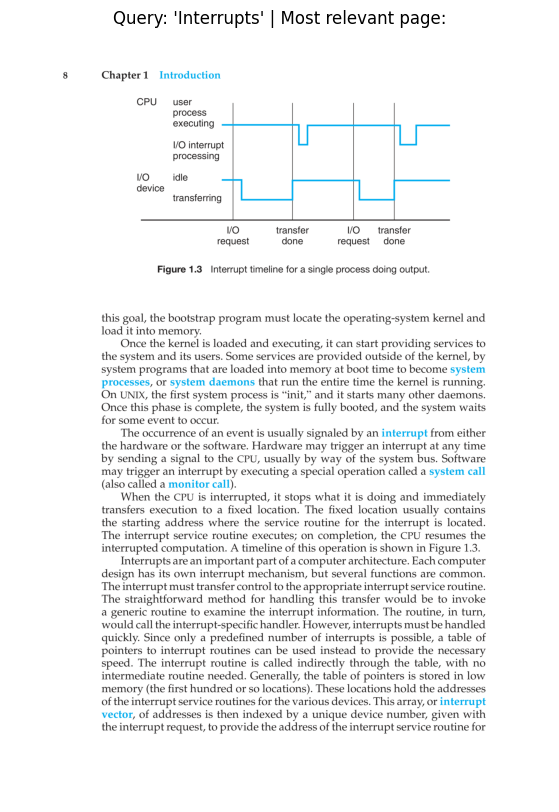

In [225]:
import fitz

#open pdf and load target page
pdf_path = "Resources\Sem - 4 OS\Abraham Silberschatz, Peter B. Galvin, Greg Gagne - Operating System Concepts-Wiley (2012).pdf"
doc = fitz.open(pdf_path)
page = doc.load_page(5 + 26)

#get the image of the page
img = page.get_pixmap(dpi=300)

doc.close()

# Convert the Pixmap to a numpy array
img_array = np.frombuffer(img.samples_mv, 
                          dtype=np.uint8).reshape((img.h, img.w, img.n))


#convert the image using Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(13, 10))
plt.imshow(img_array)
plt.title(f"Query: '{query}' | Most relevant page:")
plt.axis('off') #turn off axis
plt.show()

In [226]:
import torch

def dot_product(vector1, vector2):
    return torch.dot(vector1, vector2)

def cosine_similarity(vector1, vector2):
    dot_product = torch.dot(vector1, vector2)

    #get Euclidean/L2 norm of each vector (removes magnitude, keeps direction)
    norm_vector1 = torch.sqrt(torch.sum(vector1**2))
    norm_vector2 = torch.sqrt(torch.sum(vector2**2))    

    return dot_product / (norm_vector1 * norm_vector2)

#Example tensors
vector1 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector2 = torch.tensor([1, 2, 3], dtype=torch.float32)
vector3 = torch.tensor([4, 5, 6], dtype=torch.float32)
vector4 = torch.tensor([-1, -2, -3], dtype=torch.float32)

# Calculate dot product
print("Dot product between vector1 and vector2:", dot_product(vector1, vector2))
print("Dot product between vector1 and vector3:", dot_product(vector1, vector3))
print("Dot product between vector1 and vector4:", dot_product(vector1, vector4))

# Calculate cosine similarity
print("Cosine similarity between vector1 and vector2:", cosine_similarity(vector1, vector2))
print("Cosine similarity between vector1 and vector3:", cosine_similarity(vector1, vector3))
print("Cosine similarity between vector1 and vector4:", cosine_similarity(vector1, vector4))

Dot product between vector1 and vector2: tensor(14.)
Dot product between vector1 and vector3: tensor(32.)
Dot product between vector1 and vector4: tensor(-14.)
Cosine similarity between vector1 and vector2: tensor(1.0000)
Cosine similarity between vector1 and vector3: tensor(0.9746)
Cosine similarity between vector1 and vector4: tensor(-1.0000)


In [227]:
def retrieve_relevant_resources(query: str,
                                embeddings: torch.tensor,
                                model: SentenceTransformer=embedding_model,
                                n_resources_to_return: int = 5,
                                print_time: bool = True):
    """
    Embeds a query with model and return top k scores and indices from embeddings.
    """

    #embed the query
    query_embedding = model.encode(query,
                                   convert_to_tensor=True)
    #get dot product scores on embeddings
    start_time = timer()
    dot_scores = util.dot_score(query_embedding, embeddings)[0]
    end_time = timer()

    if print_time:
        print(f"[INFO] Time taken to get scores on {len(embeddings)} embeddings: {end_time-start_time:.5f} seconds.")

    scores, indices = torch.topk(input=dot_scores,
                                 k=n_resources_to_return)
    return scores, indices

def print_top_results_and_scores(query: str,
                                 embeddings: torch.tensor,
                                 pages_and_chunks: list[dict]=pages_and_chunks,
                                 n_resources_to_return: int = 5):
    """
    Takes a query, retrieves most relevant resources and prints them in descending order.
 
    """

    scores, indices = retrieve_relevant_resources(query=query,
                                                  embeddings=embeddings,
                                                  n_resources_to_return=n_resources_to_return)
    
    print(f"Query: {query}\n")
    print("Results:")
    #loop through zipped together scores and indicies
    for score, index in zip(scores, indices):
        print(f"Score: {score:.4f}")
        #print relevant sentence chunks 
        print_wrapped(pages_and_chunks[index]["sentence_chunk"])
        #print the page number as well 
        print(f"Page number: {pages_and_chunks[index]['page_number']}")
        print("\n")

In [228]:
query = "Process management"

#get the scores and indices of top related results
scores, indices = retrieve_relevant_resources(query=query,
                                              embeddings=embeddings)
scores, indices

[INFO] Time taken to get scores on 2434 embeddings: 0.00014 seconds.


(tensor([0.6853, 0.6542, 0.6337, 0.5797, 0.5608], device='cuda:0'),
 tensor([163, 295, 297,   7, 298], device='cuda:0'))

In [229]:
#print the texts of the top scores
print_top_results_and_scores(query=query,
                             embeddings=embeddings)

[INFO] Time taken to get scores on 2434 embeddings: 0.00021 seconds.
Query: Process management

Results:
Score: 0.6853
These facilities (dual mode, privileged instructions, memory protection, and
timer interrupt) are basic building blocks used by operating systems to achieve
correct operation. A process (or job) is the fundamental unit of work in an
operating system. Process management includes creating and deleting processes
and providing mechanisms for processes to communicate and synchronize with each
other.
Page number: 45


Score: 0.6542
Part Two Process Management A process can be thought of as a program in
execution. A process will need certain resources—such as CPU time, memory, ﬁles,
and I/O devices —to accomplish its task. These resources are allocated to the
process either when it is created or while it is executing. A process is the
unit of work in most systems. Systems consist of a collection of processes:
operating-system processes execute system code, and user processes 